In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#install twint, nest_asyncio
! pip install -qq twint
! pip install -qq nest_asyncio

In [3]:
#pip install twint
import twint
import nest_asyncio
nest_asyncio.apply()

In [4]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string

In [5]:
config = twint.Config()
config.Search = "bupati indramayu"
config.Lang = "id"
config.Limit = 50
config.Pandas = True

In [6]:
twint.run.Search(config)

1498296063853481984 2022-02-28 20:56:33 +0700 <Yunus_portrait> Bupati Indramayu Nina Agustina kagum buah naga tumbuh subur di bumi Wiralodra. Kekaguman Nina disampaikan saat ia dan sejumlah kepala dinas memanen buah naga di Desa Tambak Kecamatan Indramayu Kabupaten Indramayu, Sabtu.  #PDIPerjuangan #bangunlahjiwadanbadannya  https://t.co/9lEZupkaSB
1498294678281592833 2022-02-28 20:51:02 +0700 <jpnncom> Bupati Indramayu memberikan respons positif Gerakan Melawan Stunting yang diinisiasi oleh HaloPuan. #HaloPuan  https://t.co/3g0QhGl97I
1498293142042611712 2022-02-28 20:44:56 +0700 <Sekberindramayu> Buah Naga Indramayu Manisnya Tidak Kalah Dari Daerah Lain, Ini Kata Bupati Nina  https://t.co/zaWh6KnN2L
1498284836548718601 2022-02-28 20:11:56 +0700 <swarakonsumeni2> Buah Naga Indramayu Manisnya Tidak Kalah Dari Daerah Lain, Ini Kata Bupati Nina  https://t.co/2H3OKNoqzB
1498283946110779394 2022-02-28 20:08:24 +0700 <PDI_Perjuangan> Setelah menikmati buah naga, Bupati Indramayu Nina Agusti

In [7]:
def columne_names():
  return twint.output.panda.Tweets_df.columns

In [8]:
def twint_to_pd(columns):
  return twint.output.panda.Tweets_df[columns]

In [9]:
data= twint_to_pd(["tweet"])

In [10]:
data.head()

,tweet
0,Bupati Indramayu Nina Agustina kagum buah naga...
1,Bupati Indramayu memberikan respons positif Ge...
2,Buah Naga Indramayu Manisnya Tidak Kalah Dari ...
3,Buah Naga Indramayu Manisnya Tidak Kalah Dari ...
4,"Setelah menikmati buah naga, Bupati Indramayu ..."


In [11]:
data["tweet"]= data["tweet"].str.replace("[^a-zA-Z0-9]", " ")

<ipython-input-11-4ac155fad40e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["tweet"]= data["tweet"].str.replace("[^a-zA-Z0-9]", " ")
<ipython-input-11-4ac155fad40e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]= data["tweet"].str.replace("[^a-zA-Z0-9]", " ")


In [12]:
data

,tweet
0,Bupati Indramayu Nina Agustina kagum buah naga...
1,Bupati Indramayu memberikan respons positif Ge...
2,Buah Naga Indramayu Manisnya Tidak Kalah Dari ...
3,Buah Naga Indramayu Manisnya Tidak Kalah Dari ...
4,Setelah menikmati buah naga Bupati Indramayu ...
5,Bupati Indramayu Nina Agustina kagum buah naga...
6,Bupati Nina Agustina Tinjau Desa Mekarjaya ya...
7,Bupati Nina Sambut Kunjungan BPK Terkait Entr...
8,Bupati Nina Ingin Jembatan Timbang Losarang I...
9,Bawakan Tari Topeng Kelana Gandrung Bupati I...


In [13]:
# removing short words/ punctuation
data["tweet"]= data["tweet"].apply(lambda x: " ".join ([w for w in x.split() if len (w)>3]))

<ipython-input-13-d7b474186866>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]= data["tweet"].apply(lambda x: " ".join ([w for w in x.split() if len (w)>3]))


In [14]:
# tokenize the data
def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens
data['tweet']= data['tweet'].apply (lambda x: tokenize(x.lower()))

<ipython-input-14-2b9731375bb9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']= data['tweet'].apply (lambda x: tokenize(x.lower()))


In [15]:
nltk.download("stopwords")
stopwords = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# remove stopwords
def remove_stopword(text):
    text_nostopword= [char for char in text if char not in stopwords]
    return text_nostopword

data['tweet']= data['tweet'].apply(lambda x: remove_stopword(x))

<ipython-input-16-cdf68c83295d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']= data['tweet'].apply(lambda x: remove_stopword(x))


In [17]:
data

,tweet
0,"[bupati, indramayu, nina, agustina, kagum, bua..."
1,"[bupati, indramayu, respons, positif, gerakan,..."
2,"[buah, naga, indramayu, manisnya, kalah, daera..."
3,"[buah, naga, indramayu, manisnya, kalah, daera..."
4,"[menikmati, buah, naga, bupati, indramayu, nin..."
5,"[bupati, indramayu, nina, agustina, kagum, bua..."
6,"[bupati, nina, agustina, tinjau, desa, mekarja..."
7,"[bupati, nina, sambut, kunjungan, terkait, ent..."
8,"[bupati, nina, jembatan, timbang, losarang, in..."
9,"[bawakan, tari, topeng, kelana, gandrung, bupa..."


In [18]:
#Porter Stemmer
ps= nltk.PorterStemmer()

In [19]:
# stemming 
def stem(tweet_no_stopword):
   text = [ps.stem ( word) for word in tweet_no_stopword]
   return text

data["tweet"]= data["tweet"].apply(lambda x: stem(x))

<ipython-input-19-f4640d3cb2c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]= data["tweet"].apply(lambda x: stem(x))


In [20]:
data

,tweet
0,"[bupati, indramayu, nina, agustina, kagum, bua..."
1,"[bupati, indramayu, respon, positif, gerakan, ..."
2,"[buah, naga, indramayu, manisnya, kalah, daera..."
3,"[buah, naga, indramayu, manisnya, kalah, daera..."
4,"[menikmati, buah, naga, bupati, indramayu, nin..."
5,"[bupati, indramayu, nina, agustina, kagum, bua..."
6,"[bupati, nina, agustina, tinjau, desa, mekarja..."
7,"[bupati, nina, sambut, kunjungan, terkait, ent..."
8,"[bupati, nina, jembatan, timbang, losarang, in..."
9,"[bawakan, tari, topeng, kelana, gandrung, bupa..."


##### perubahan data e.g kata "respons" jadi "respon"

In [21]:
data= pd.DataFrame(data["tweet"])

In [22]:
data.head()

,tweet
0,"[bupati, indramayu, nina, agustina, kagum, bua..."
1,"[bupati, indramayu, respon, positif, gerakan, ..."
2,"[buah, naga, indramayu, manisnya, kalah, daera..."
3,"[buah, naga, indramayu, manisnya, kalah, daera..."
4,"[menikmati, buah, naga, bupati, indramayu, nin..."


In [23]:
data_list = data.loc[:,"tweet"].to_list()
len(data_list)

53

In [24]:
data_list

[['bupati',
  'indramayu',
  'nina',
  'agustina',
  'kagum',
  'buah',
  'naga',
  'tumbuh',
  'subur',
  'bumi',
  'wiralodra',
  'kekaguman',
  'nina',
  'kepala',
  'dina',
  'memanen',
  'buah',
  'naga',
  'desa',
  'tambak',
  'kecamatan',
  'indramayu',
  'kabupaten',
  'indramayu',
  'sabtu',
  'pdiperjuangan',
  'bangunlahjiwadanbadannya',
  'http',
  '9lezupkasb'],
 ['bupati',
  'indramayu',
  'respon',
  'positif',
  'gerakan',
  'melawan',
  'stunt',
  'diinisiasi',
  'halopuan',
  'halopuan',
  'http',
  '3g0qhgl97i'],
 ['buah',
  'naga',
  'indramayu',
  'manisnya',
  'kalah',
  'daerah',
  'bupati',
  'nina',
  'http',
  'zawh6knn2l'],
 ['buah',
  'naga',
  'indramayu',
  'manisnya',
  'kalah',
  'daerah',
  'bupati',
  'nina',
  'http',
  '2h3oknoqzb'],
 ['menikmati',
  'buah',
  'naga',
  'bupati',
  'indramayu',
  'nina',
  'agustina',
  'tanah',
  'subur',
  'indramayu',
  'tumbuh',
  'pohon',
  'mangga',
  'ditanami',
  'buah',
  'naga',
  'mani',
  'kalah',
  'dae

In [25]:
# putting the twitter in flat list
flat_data_list = [item for sublist in data_list for item in sublist]
len(flat_data_list)

817

In [26]:
flat_data_list

['bupati',
 'indramayu',
 'nina',
 'agustina',
 'kagum',
 'buah',
 'naga',
 'tumbuh',
 'subur',
 'bumi',
 'wiralodra',
 'kekaguman',
 'nina',
 'kepala',
 'dina',
 'memanen',
 'buah',
 'naga',
 'desa',
 'tambak',
 'kecamatan',
 'indramayu',
 'kabupaten',
 'indramayu',
 'sabtu',
 'pdiperjuangan',
 'bangunlahjiwadanbadannya',
 'http',
 '9lezupkasb',
 'bupati',
 'indramayu',
 'respon',
 'positif',
 'gerakan',
 'melawan',
 'stunt',
 'diinisiasi',
 'halopuan',
 'halopuan',
 'http',
 '3g0qhgl97i',
 'buah',
 'naga',
 'indramayu',
 'manisnya',
 'kalah',
 'daerah',
 'bupati',
 'nina',
 'http',
 'zawh6knn2l',
 'buah',
 'naga',
 'indramayu',
 'manisnya',
 'kalah',
 'daerah',
 'bupati',
 'nina',
 'http',
 '2h3oknoqzb',
 'menikmati',
 'buah',
 'naga',
 'bupati',
 'indramayu',
 'nina',
 'agustina',
 'tanah',
 'subur',
 'indramayu',
 'tumbuh',
 'pohon',
 'mangga',
 'ditanami',
 'buah',
 'naga',
 'mani',
 'kalah',
 'daerah',
 'bupati',
 'indramayu',
 'nina',
 'agustina',
 'kagum',
 'buah',
 'naga',
 't

In [27]:
data_count= pd.DataFrame(flat_data_list)
data_count= data_count[0].value_counts()

In [28]:
data_count= pd.DataFrame(flat_data_list)
data_count= data_count[0].value_counts()

In [29]:
from nltk.probability import FreqDist
freq_count= FreqDist()
for words in data_count:
  freq_count[words] +=1

freq_count

FreqDist({1: 195, 2: 65, 3: 24, 4: 12, 5: 8, 7: 4, 13: 2, 9: 2, 6: 2, 70: 1, ...})

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


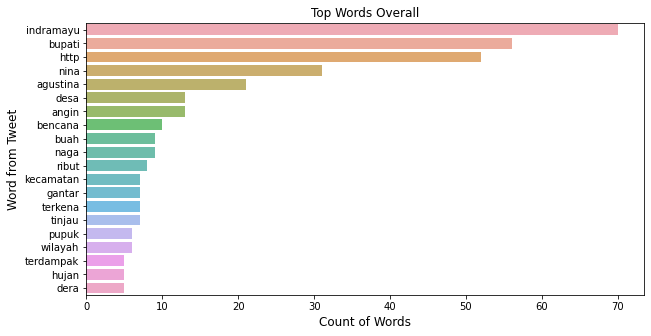

In [30]:
data_count = data_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(data_count.values, data_count.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [31]:
data.to_csv("D:\\dmw\\bupati_indramayu.csv", index=False)

In [32]:
#pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint